In [1]:
# @title $Start$
# Import necessary libraries for plotting and matrix operations
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure  # For setting figure size
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt  # Import various matrix functions from sympy
from scipy import linalg  # Import linear algebra functions from scipy
from functools import reduce  # Import reduce function from functools

# Define a function `modulo_n` to reduce the coefficients of a polynomial modulo `n`
def modulo_n(n, f):
    # Convert input polynomial `f` into a sympy Poly object for easier manipulation
    f = sp.Poly(f)

    # Get the variables (generators) of the polynomial
    Gen = f.gens

    # Extract the coefficients of the polynomial
    Coef = f.coeffs()

    # Extract the monomials (terms with powers of variables) of the polynomial
    Mono = f.monoms()

    # Loop through each coefficient to reduce it modulo `n`
    for i in range(len(Coef)):
        Coef[i] = Coef[i] % n  # Take each coefficient mod `n`

    # Initialize an expression variable to reconstruct the polynomial with new coefficients
    expr = 0

    # Rebuild the polynomial using the modified coefficients and monomials
    for i in range(len(Coef)):
        monomial = 1  # Start with a monomial value of 1

        # Loop through the variables of the polynomial and raise them to the appropriate power
        for j in range(len(Gen)):
            monomial = monomial * Gen[j] ** Mono[i][j]  # Multiply variable raised to the power

        # Add the term (coefficient * monomial) to the expression
        expr = expr + Coef[i] * monomial

    # Return the final polynomial with coefficients reduced modulo `n`
    return expr


In [3]:
# @title $Enter \ \ Generators \ \ of \ \ Ideal$

# Import necessary libraries for symbolic mathematics and array operations
import sympy as sp  # For symbolic mathematics
import numpy as np  # For numerical operations (although unused here)
import itertools  # For working with cross products of lists

# Prompt user to enter the number of generators for the ideal
d0 = int(input('Number of Generators : '))  # d0 stores the number of generators

# Initialize an empty list to store the generators of the ideal
generators = []

# Loop to collect each generator from the user
for i in range(d0):
    # Print a message asking the user to enter the i-th generator
    print('enter g', i+1, ':', sep='')  # 'sep=' is used to remove spaces between 'g' and the number

    # Take input from the user as a string
    gen_temp = input(": ")

    # Convert the string input into a symbolic expression using sympy
    gen_temp = sp.sympify(gen_temp)

    # Append the symbolic generator to the list of generators
    generators.append(gen_temp)


Number of Generators : 3
enter g1:
: x**2
enter g2:
: y**2
enter g3:
: z**2


In [4]:
#@title $Choose \ \ Base \ \ Ring$

# Variable to choose the base ring from a list of predefined options
choose_ring = "Z(n)" #@param ["C","R", "Q", "Z", "Z(n)"] {allow-input: true}
  # User selects the base ring. Options are "C" (Complex), "R" (Real), "Q" (Rational), "Z" (Integers), or "Z(n)" (Integers modulo n)
# The user can either select from the dropdown or input custom values due to `allow-input: true`.

# Conditional statements to map the user selection to the corresponding ring in symbolic math libraries
if (choose_ring == "C"):
    # If the chosen ring is "C" (Complex numbers), set ring to "CC"
    ring = "CC"
elif (choose_ring == "R"):
    # If the chosen ring is "R" (Real numbers), set ring to "RR"
    ring = "RR"
elif (choose_ring == "Q"):
    # If the chosen ring is "Q" (Rational numbers), set ring to "QQ"
    ring = "QQ"
elif (choose_ring == "Z"):
    # If the chosen ring is "Z" (Integers), set ring to "ZZ"
    ring = "ZZ"
elif (choose_ring == "Z(n)"):
    # If the chosen ring is "Z(n)" (Integers modulo n), prompt the user to input the value of n
    d0 = int(input('n = '))  # Ask for the modulus value `n`

    # Set the ring to a finite field with modulo `n`, using the form "GF(n)"
    ring = "GF(" + str(d0) + ")"

n = 2


In [5]:
# @title $Variables \ \ and \ \ Order$

# Variable to choose the monomial order from a list of predefined options
choose_order = "lex" #@param ["lex", "grlex", "grevlex"]
# User selects the monomial order. Options are "lex" (lexicographic), "grlex" (graded lexicographic), "grevlex" (graded reverse lexicographic)

# Prompt user to input variables, separated by commas, and convert them to sympy symbolic variables
X = [sp.sympify(i) for i in input("Enter variables separated by ',':").split(',')]
# The input is split by commas, and each variable is converted into a symbolic expression using `sympify`. This creates a list of symbolic variables `X`.

# Create a dictionary where each variable name is mapped to the corresponding sympy variable
v = dict([(i.name, i) for i in X])  # The variable name is the key, and the corresponding sympy object is the value.
# This dictionary `v` allows easy lookup of variables by name, where `i.name` gives the string name of each variable in `X`, and `i` is the corresponding sympy variable.

Enter variables separated by ',':x,y,z


In [6]:
# @title $Grobner \ \ Basis \ \ for \ \ Ideal$ { form-width: "20%" }

# User selects the algorithm for computing the Grobner Basis
algorithm = "buchberger" #@param ["buchberger", "f5b"]
# Options: "buchberger" or "f5b" algorithms for Grobner Basis computation

# Import necessary display functions for rendering mathematical symbols in LaTeX
from IPython.display import HTML, Math

# Display the header for the Grobner Basis calculation in LaTeX format
display(Math(r'Grobner \ \ Basis \ \ G \ ='))

# Initialize an empty list to hold the symbolic variables used in Grobner basis computation
var = []  # List of variables
for i in range(len(X)):
    var.append(X[i])  # Add each variable from X to the var list

# Compute the Grobner Basis G using the chosen algorithm, ring, order, and generators
G = sp.groebner(generators, var, domain=ring, order=choose_order, method=algorithm)

# Display each element of the Grobner Basis in LaTeX format
for i in range(len(G)):
    display(Math(r'{\large g_{_{'+sp.latex(i+1)+r'}}='+sp.latex(sp.nsimplify(G[i]))+r'}'))
    print()  # Print an empty line for spacing

# Try checking if the ideal is zero-dimensional
try:
    check_zero_dim = sp.is_zero_dimensional(G, order=choose_order)

    # Display whether the ideal is zero-dimensional based on the check
    if (check_zero_dim == 1):
        display(Math(r'Ideal \ \ is \ \ Zero \ \ Dimensional \ !'))
    else:
        display(Math(r'Ideal \ \ is \ \ Not \ \ a \ \ Zero \ \ Dimensional \ !!'))
except:
    pass  # In case of an exception, continue execution without interruption

# If the ideal is zero-dimensional, proceed to compute leading monomials and standard basis
if (check_zero_dim == 1):
    print()
    print()

    # Display the heading for leading monomials of the Grobner Basis
    display(Math(r'Leading \ \  Monomials \ \ of \ \ G '))

    LM_G = []  # List to store leading monomials of Grobner Basis
    for i in range(len(G)):
        temp = sp.LM(G[i], var, order=choose_order)  # Compute the leading monomial of each Grobner Basis element
        LM_G.append(temp)

        # Display each leading monomial in LaTeX format
        display(Math(r'{\large LM \left( g_{_{'+sp.latex(i+1)+r'}} \right)='+sp.latex(temp)+r'}'))
        print()  # Print an empty line for spacing

    # Initialize a list to store the exponent vectors of the leading monomials
    expo_vect_LT = []  # Exponent of LT/LM (exponent_x, exponent_y)
    for i in range(len(LM_G)):
        expo_vect_LT.append(sp.degree_list(LM_G[i], tuple(X)))  # Get the degree list (exponents) of each leading monomial

    # Find the maximum exponent for each variable
    max_exp = []  # Maximum exponents
    expo_vect1 = np.array(expo_vect_LT)  # Convert exponent vector to a numpy array
    for i in range(len(X)):
        max_exp.append(max(expo_vect1[:, i]))  # Find the maximum exponent for each variable

    # Calculate the total number of monomials based on the maximum exponents
    total_monomials = 1
    for i in range(len(max_exp)):
        total_monomials = total_monomials * max_exp[i]  # Multiply the maximum exponents

    # Generate a list of exponents for each variable
    list0 = []  # Exponents of x, y coordinates
    for i in range(len(max_exp)):
        temp_list = [(j) for j in range(max_exp[i])]  # Create a list of exponents for each variable
        list0.append(temp_list)

    # Generate the exponent vectors for the standard basis
    expo_vect = []  # Exponents of standard basis
    for element in itertools.product(*list0):  # Cartesian product of the exponent lists
        expo_vect.append(element)

    # Remove exponent vectors that are dominated by the leading terms of the Grobner Basis
    k = 0
    while (k < len(expo_vect_LT)):
        vect_lt = expo_vect_LT[k]
        j = 0
        while (j < len(expo_vect)):
            vect = expo_vect[j]
            check = 0
            for i in range(len(vect)):
                if (vect_lt[i] <= vect[i] and check == 0):
                    pass  # If the exponent of the leading term is less than or equal to the exponent, continue
                else:
                    check = 1  # If any exponent is greater, mark check as 1 and break the loop
                    break

            if (check == 0):
                expo_vect.remove(vect)  # Remove the dominated exponent vector
            else:
                j = j + 1

        k = k + 1

    print()
    # Display the standard basis in LaTeX format
    display(Math(r'\therefore \ \ Standard \ \ Basis  \ \ is:'))
    print()

    # Initialize a list to store the standard basis polynomials
    std_basis = []
    x = sp.symbols('x')
    y = sp.symbols('y')
    z = sp.symbols('z')

    # Construct each standard basis polynomial from the exponent vectors
    for i in range(len(expo_vect)):
        poly = 1
        for j in range(len(expo_vect[i])):
            poly = poly * var[j]**expo_vect[i][j]  # Raise each variable to the corresponding exponent
        std_basis.append(poly)

    # Format the standard basis as a LaTeX expression for display
    expr = r' {\large \ B= \left \{ '
    for i in range(len(std_basis)):
        expr = expr + sp.latex(std_basis[i])  # Convert each standard basis polynomial to LaTeX
        if (i != (len(std_basis) - 1)):
            expr = expr + r' \ , \ '  # Add a comma between polynomials
    expr = expr + r' \right \} } '

    # Display the formatted standard basis
    display(Math(expr))
    print()

    # Display the dimension of the standard basis in LaTeX format
    display(Math(r'Dimension =' + sp.latex(len(std_basis))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# @title $Quotient \ \ Ring$

# Prepare the LaTeX representation of the ideal generators for the quotient ring
temp = r'\left \langle '
for i in range(len(generators)):
    temp = temp + sp.latex(generators[i])  # Add each generator in LaTeX format
    if (i != (len(generators) - 1)):
        temp = temp + r' \ , \ '  # Separate generators with a comma
temp = temp + r'\right \rangle '

# Construct the LaTeX representation of the quotient ring depending on the base ring
if (choose_ring == "Z(n)"):
    # For Z(n), use modular notation with base n
    quotient_ring = r'\frac{ Z_{'+sp.latex(d0)+r'}'+sp.latex(var)+r'} {'+temp+r'}'
else:
    # For other rings (C, R, Q, Z), simply use the chosen ring name
    quotient_ring = r'\frac{'+sp.latex(choose_ring)+sp.latex(var)+r'} {'+temp+r'}'

# Prepare the LaTeX representation for the standard basis in the quotient ring
temp1 = r' \left \langle '
for j in range(len(std_basis)):
    temp1 = temp1 + r'\bar{' + sp.latex(std_basis[j]) + r'}'  # Overline to represent elements of the quotient ring
    if (j != (len(std_basis) - 1)):
        temp1 = temp1 + r' \ , \ '  # Separate with a comma
temp1 = temp1 + r' \right \rangle }'

# Display the final LaTeX expression for the quotient ring
display(Math(r'{\large ' + quotient_ring + r'=' + temp1))
print()
print()

# The length of the standard basis and number of elements in the quotient ring
k = len(std_basis)
n = d0**k  # Calculate total number of elements in the quotient ring (d0 is the modulus)

# Initialize a list of coefficients for each element in the quotient ring
coeff = [[(0) for j in range(k)]]  # Start with the zero element

# Generate all possible coefficients for the quotient ring elements (mod d0)
for i in range(1, n):
    list0 = [(0) for j in range(k)]  # Initialize coefficient list for the current element
    count = 0
    while (i > 0):
        r = i % d0  # Modulus operation to find remainder
        list0[count] = r  # Assign remainder as the coefficient for the current variable
        i = i // d0  # Integer division for the next coefficient
        count = count + 1
    coeff.append(list0)  # Append the coefficient list to the total coefficients

# Create elements of the quotient ring using the standard basis and coefficients
QRing = []  # List to store elements of the quotient ring
for every in coeff:
    elt = 0
    QRing.append(sum([(every[i] * std_basis[i]) for i in range(k)]))  # Construct each element by combining the standard basis and coefficients

# Display the total number of elements in the quotient ring
display(Math(r'Total \ \ Number \ \ of \ \ Elements \ ='+sp.latex(len(QRing))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# @title $Non-Units \ \ of \ \ Ring \ \ R \ : \ R^{*}$

non_units = []  # List to store the non-units (zero divisors) of the quotient ring
red_elts = {}   # Dictionary to store elements and their reduced forms
constants = {}  # Dictionary to store constant reductions mod d0
modulo = {}     # Dictionary to store reduced polynomials mod n

count = 0  # Initialize counter to track progress

# Loop through all elements in the quotient ring
for f in QRing:
    count = count + 1  # Increment the counter for each element
    print(count, '/', len(QRing), sep="", end=',')  # Display progress
    if(count % 25 == 0):  # Print a new line after every 25 elements for better readability
        print()

    # Loop through the standard basis to check if 'f' is a zero divisor
    for g in std_basis:
        h0 = sp.expand(f * g)  # Multiply the current element 'f' with a basis element 'g' and expand

        # Check if the expanded element h0 has already been reduced
        if(h0 in red_elts.keys()):
            h = red_elts[h0]  # If already reduced, use the stored result
        else:
            # Reduce the element using the Grobner basis, retaining the remainder (h1)
            h1 = sp.reduced(h0, G, var, domain=ring, order=choose_order)[1]

            # Check if the remainder h1 is constant and if it has already been reduced mod d0
            if(h1 in constants.keys()):
                h = constants[h1]  # If reduced before, use the stored value
            else:
                # If h1 is constant, reduce it mod d0 and store it in constants
                if(h1.is_constant()):
                    h = h1 % d0
                    constants[h1] = h  # Store the result for future use
                else:
                    # If h1 is not constant, reduce it modulo n if not done already
                    if(h1 in modulo.keys()):
                        h = modulo[h1]  # Use the stored reduction if available
                    else:
                        # Use the modulo_n function to reduce the polynomial h1 mod n
                        h = modulo_n(d0, h1)
                        modulo[h1] = h  # Store the result for future use

            # Store the reduced form of h0 in the red_elts dictionary
            red_elts[h0] = h

        # If the reduced element h is 0, f is a zero divisor (non-unit), so add it to the non_units list
        if(h == 0):
            non_units.append(f)
            break  # No need to check further if f is already identified as a non-unit

# Find the units (elements that are not zero divisors) in the quotient ring
units = [elt for elt in QRing if elt not in non_units]  # Elements that are not in non_units are units

1/256,2/256,3/256,4/256,5/256,6/256,7/256,8/256,9/256,10/256,11/256,12/256,13/256,14/256,15/256,16/256,17/256,18/256,19/256,20/256,21/256,22/256,23/256,24/256,25/256,
26/256,27/256,28/256,29/256,30/256,31/256,32/256,33/256,34/256,35/256,36/256,37/256,38/256,39/256,40/256,41/256,42/256,43/256,44/256,45/256,46/256,47/256,48/256,49/256,50/256,
51/256,52/256,53/256,54/256,55/256,56/256,57/256,58/256,59/256,60/256,61/256,62/256,63/256,64/256,65/256,66/256,67/256,68/256,69/256,70/256,71/256,72/256,73/256,74/256,75/256,
76/256,77/256,78/256,79/256,80/256,81/256,82/256,83/256,84/256,85/256,86/256,87/256,88/256,89/256,90/256,91/256,92/256,93/256,94/256,95/256,96/256,97/256,98/256,99/256,100/256,
101/256,102/256,103/256,104/256,105/256,106/256,107/256,108/256,109/256,110/256,111/256,112/256,113/256,114/256,115/256,116/256,117/256,118/256,119/256,120/256,121/256,122/256,123/256,124/256,125/256,
126/256,127/256,128/256,129/256,130/256,131/256,132/256,133/256,134/256,135/256,136/256,137/256,138/256

In [9]:
# @title $Associate \ \ Classes \ \ of \ \ R$ { form-width: "20%" }
# @markdown $ [a]=[b]$ $ \space iff \space$ $ a $ $=$ $ub$

# Units of the quotient ring are those elements that are not zero divisors
units = [elt for elt in QRing if elt not in non_units]  # Units of the ring

# Dictionary to store associate classes for non-units
associates = {}
count = 0  # Counter to track progress

# Loop through all non-units (zero divisors) to find their associates
for elt1 in non_units:
    count = count + 1  # Increment the counter
    print(count, '/', len(non_units), sep="", end=',')  # Display progress
    if(count % 25 == 0):  # Print a new line every 25 iterations
        print()

    associates[elt1] = set()  # Initialize the set for the current element's associates

    # Multiply elt1 by each unit in the ring to find its associates
    for elt2 in units:
        h0 = sp.expand(elt1 * elt2)  # Multiply the non-unit with a unit and expand

        # If the product h0 has already been reduced, use the stored value
        if(h0 in red_elts.keys()):
            h = red_elts[h0]
        else:
            # Reduce the product h0 using the Grobner basis, keeping only the remainder h1
            h1 = sp.reduced(h0, G, var, domain=ring, order=choose_order)[1]

            # If the remainder h1 is a constant and has been reduced mod d0, use the stored result
            if(h1 in constants.keys()):
                h = constants[h1]
            else:
                # Check if h1 is a constant number by inspecting its type
                if(str(type(h1)).split('.')[:3] == ["<class 'sympy", 'core', 'numbers']):
                    h = h1 % d0  # Reduce the constant mod d0
                    constants[h1] = h  # Store the reduced result for future use
                else:
                    # If h1 is not constant, reduce it mod n using modulo_n function
                    h = modulo_n(d0, h1)
                    modulo[h1] = h  # Store the result

        # Store the reduced form of h0 in the dictionary red_elts
        red_elts[h0] = h
        # Add the reduced result to the associate class of elt1
        associates[elt1].add(h)

print()

# Convert sets of associates into lists for easier processing
for elt in associates:
    associates[elt] = list(associates[elt])

# Remove any associate classes that only contain the element [0]
temp = []
for elt in associates:
    if (associates[elt] == list([0])):
        temp.append(elt)

# Remove elements with associate class [0] from the associates dictionary
for elt in temp:
    del associates[elt]

print()

# Create a list of non-units (zero divisors) that have non-trivial associate classes
zn_star = []  # Vertices for compressed associate class graph
for elt in associates:
    zn_star.append(elt)

# Find equivalence classes of associates
eq_class = []  # List of equivalence classes
i = 0
while (len(zn_star) >= 1):  # While there are still non-units left to process
    elt1 = zn_star[i]  # Take the first element in zn_star
    temp = [elt1]  # Initialize a temporary list for the equivalence class
    zn_star.remove(elt1)  # Remove elt1 from zn_star

    # Find all elements with the same associate class as elt1
    for elt2 in associates:
        if (elt1 != elt2 and set(associates[elt1]) == set(associates[elt2])):
            temp.append(elt2)  # Add elt2 to the equivalence class
            zn_star.remove(elt2)  # Remove elt2 from zn_star

    eq_class.append(temp)  # Add the found equivalence class to the list

# Create a dictionary to store the representative of each equivalence class
repAsso_class = {}  # Representative of each equivalence class and its corresponding equivalence class
for i in range(len(eq_class)):
    cls = eq_class[i]
    repAsso_class[cls[0]] = cls  # Use the first element of the class as the representative

1/128,2/128,3/128,4/128,5/128,6/128,7/128,8/128,9/128,10/128,11/128,12/128,13/128,14/128,15/128,16/128,17/128,18/128,19/128,20/128,21/128,22/128,23/128,24/128,25/128,
26/128,27/128,28/128,29/128,30/128,31/128,32/128,33/128,34/128,35/128,36/128,37/128,38/128,39/128,40/128,41/128,42/128,43/128,44/128,45/128,46/128,47/128,48/128,49/128,50/128,
51/128,52/128,53/128,54/128,55/128,56/128,57/128,58/128,59/128,60/128,61/128,62/128,63/128,64/128,65/128,66/128,67/128,68/128,69/128,70/128,71/128,72/128,73/128,74/128,75/128,
76/128,77/128,78/128,79/128,80/128,81/128,82/128,83/128,84/128,85/128,86/128,87/128,88/128,89/128,90/128,91/128,92/128,93/128,94/128,95/128,96/128,97/128,98/128,99/128,100/128,
101/128,102/128,103/128,104/128,105/128,106/128,107/128,108/128,109/128,110/128,111/128,112/128,113/128,114/128,115/128,116/128,117/128,118/128,119/128,120/128,121/128,122/128,123/128,124/128,125/128,
126/128,127/128,128/128,



In [10]:
# @title $Generators \ \ of \ \ Ideals$

# Extract the keys from the repAsso_class dictionary, which represent the generators of the ideals
idl_gens = repAsso_class.keys()

# Display the list of generators in LaTeX format
display(Math(sp.latex(list(idl_gens))))
print()

# Display the number of generators in the ideal
display(Math(r'No. \ \ of \ \ Generators \ :' + sp.latex(len(idl_gens))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# @title $Principal \ \ Ideals$

Pr_ideals = {}  # Dictionary to store principal ideals, which are all R-multiples of the representatives (generators) of the orbits
All_ideals = {} # Dictionary to store all unique ideals

# Loop through each generator of the ideal (idl_gens)
for g in idl_gens:
    temp = []  # Temporary list to store all elements of the principal ideal generated by g
    for e in QRing:  # Iterate over all elements in the quotient ring (QRing)
        h0 = sp.expand(g * e)  # Multiply generator g by element e and expand the result

        # If the result h0 has already been reduced, retrieve its reduced form from red_elts
        if(h0 in red_elts.keys()):
            h = red_elts[h0]
        else:
            # If h0 is not already reduced, reduce it using the Grobner basis
            h = sp.reduced(h0, G, var, domain=ring, order=choose_order)[1]

            # If the reduced result is 0, store it in red_elts
            if(h == 0):
                red_elts[h0] = h
            else:
                # Otherwise, compute the modulo n reduction and store it in red_elts
                h = modulo_n(d0, h)
                red_elts[h0] = h

        # If the reduced result is not already in the temp list, add it
        if(h not in temp):
            temp.append(h)

    # Check if the current ideal (temp) is already in All_ideals
    check = 1
    for ideal0 in All_ideals.values():
        if(set(temp) == set(ideal0)):  # If an identical ideal exists, mark it
            check = 0
            break

    # If the ideal is unique, add it to the Pr_ideals and All_ideals dictionaries
    if(check == 1):
        Pr_ideals[g] = temp  # Store the principal ideal generated by g
        All_ideals[tuple((g,))] = set(temp)  # Store the unique set of ideal elements

# Display all principal ideals in a readable format
display(Math(r'All \ \ Principal \ \ Ideals:'))
for key in Pr_ideals.keys():
    display(Math(r'{Generator \ : \ ' + sp.latex(key)+r'}'))  # Display the generator of the ideal
    display(Math(r'Size ='+sp.latex(len(Pr_ideals[key]))))  # Display the size of the ideal
    print('------------------------------------------------------')

print()

# Display the total number of principal ideals
display(Math(r'No. \ \ of \ \ Principal \ \ Ideals \ :'+sp.latex(len(Pr_ideals.keys()))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------



<IPython.core.display.Math object>

# $Doubly \ \ Generated \ \ Idels$

In [12]:
# @title $All \ \ two \ \ combinations \ \ of \ \ generators$

# Remove principal ideals that have cardinality equal to |m| (m-maximal ideal)
pr_idl_gens = list(idl_gens)  # Create a list of generators for principal ideals
N = len(non_units)  # Number of non-units in the quotient ring

# Determine the length of the ideal to exclude from pr_idl_gens
if(N % 2 == 0):
    len_idl = N // 2  # If N is even, use half of N
else:
    i = int(np.ceil(N / 2))  # If N is odd, find the largest divisor of N that is less than or equal to N / 2
    while(N % i != 0):
        i = i - 1
    len_idl = i

# Remove principal ideals with the specified cardinality from pr_idl_gens
for key in Pr_ideals.keys():
    if(len(Pr_ideals[key]) == len_idl):
        pr_idl_gens.remove(key)

# Number of generators after filtering
len_gens = len(pr_idl_gens)  # The number of remaining generators

# Generate all possible two combinations of the remaining generators
two_comb = []  # List to store all combinations of two generators
two_comb.extend(itertools.combinations(pr_idl_gens, 2))  # Compute combinations

# Display the number of all possible two combinations
display(Math(r'No. \ \ of \ \ all \ \ possible \ two \ combinations \ : \ ' + sp.latex(len(two_comb))))

<IPython.core.display.Math object>

In [13]:
# @title $Ideals \ \ generated \ \ by \ \ two \ \ elements$

# Initialize list to store maximum ideals generated by single elements
gen_max_idl = [set(X)]
k_gen_ideals = {}  # Dictionary to store all ideals generated by two elements

if(True):  # Conditional block to generate ideals by two elements
    for gens in two_comb:  # Iterate over each pair of generators
        temp_list = [Pr_ideals[elt] for elt in gens]  # List of principal ideals generated by the current pair of generators
        all_two_comb = list(set(list(itertools.product(*temp_list, repeat=1))))  # Compute all combinations of ideals
        temp = []  # Temporary list to store the ideals generated by the current pair
        check = 1  # Flag to indicate if the ideal is new

        for tup0 in all_two_comb:  # Iterate over each combination of ideals
            if(set(tup0) in gen_max_idl):  # Check if the ideal combination is already in gen_max_idl
                check = 0
            else:
                if(len(temp) > len_idl or set(X).issubset(set(temp))):  # If the ideal is maximal or contains all variables
                    gen_max_idl.append(set(gens))  # Add the generators to gen_max_idl
                    check = 0
                    break
                else:
                    h0 = sp.expand(sum(tup0))  # Expand the sum of the ideals in the combination

                    # Reduce the expanded ideal
                    if(h0 in red_elts.keys()):
                        h = red_elts[h0]  # Retrieve precomputed reduced form
                    else:
                        h = sp.reduced(h0, G, var, domain=ring, order=choose_order)[1]
                        if(h == 0):
                            red_elts[h0] = h
                        else:
                            h = modulo_n(d0, h)
                            red_elts[h0] = h

                    if(h not in temp):  # Add new ideals to the temporary list
                        temp.append(h)

        if(check == 1):  # If the ideal combination is new
            for ideal0 in All_ideals.values():
                if(set(temp) == set(ideal0)):  # Check if the ideal matches an existing one
                    check = 0
                    break

        if(check == 1):  # If the ideal is unique
            k_gen_ideals[gens] = set(temp)  # Store the ideal in k_gen_ideals
            All_ideals[gens] = set(temp)  # Store the ideal in All_ideals

# Display all generated ideals by two elements
display(Math(r'All \ \ two \ \ Generated \ \ Ideals:'))
for key in k_gen_ideals.keys():
    display(Math(r'{Generator \ : \ ' + sp.latex(key) + r'}'))  # Display the generator pair
    display(r'Size = ' + sp.latex(len(k_gen_ideals[key])))  # Display the size of the generated ideal
    print('------------------------------------------------------')

print()

# Display the total number of distinct ideals generated by two elements
display(Math(r'No. \ \ of \ \ Doubly \ \ Generated \ \ Ideals \ : ' + sp.latex(len(k_gen_ideals.keys()))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'Size = 64'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 64'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 64'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 32'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 64'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 64'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 32'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 64'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 64'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 32'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 32'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 32'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 32'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 32'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 8'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 8'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 8'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 8'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 8'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 8'

------------------------------------------------------


<IPython.core.display.Math object>

'Size = 8'

------------------------------------------------------



<IPython.core.display.Math object>

In [14]:
# @title $All \ \ Ideals$

# Initialize the All_ideals dictionary with the ideal generated by all non-units
All_ideals[tuple(X)] = set(non_units)

# Determine the length of ideals to be excluded based on the total number of non-units
if(N % 2 == 0):
    len_idl = N // 2
else:
    i = int(np.ceil(N / 2))  # Compute ceiling of N/2
    while(N % i != 0):  # Find the largest divisor of N
        i = i - 1
    len_idl = i

stop = 0  # Initialize stop flag
while(stop == 0):  # Loop until no more k+1 generated ideals are found
    k_idl_gens = []  # List to store generators of k-generated ideals
    for key0 in k_gen_ideals.keys():
        k_idl_gens.append(key0)

    # Remove k-generated ideals whose cardinality is equal to |m|/2
    for key in k_gen_ideals.keys():
        if(len(k_gen_ideals[key]) >= len_idl):
            k_idl_gens.remove(key)

    kp1_gen_ideals = {}  # Dictionary to store ideals generated by k+1 generators
    for key1 in k_idl_gens:
        for key2 in pr_idl_gens:
            if(key2 not in key1):
                # Check if the union of key1 and key2 already exists in gen_max_idl
                if(any((tup0) in (set(key1).union({key2})) for tup0 in gen_max_idl)):
                    break
                else:
                    temp_ideal = set()  # Temporary set to store the new ideal generated
                    for elt1 in k_gen_ideals[key1]:
                        for elt2 in Pr_ideals[key2]:
                            h0 = sp.expand(sum([elt1, elt2]))  # Expand the sum of ideals

                            # Reduce the expanded ideal
                            if(h0 in red_elts.keys()):
                                h = red_elts[h0]
                            else:
                                h = sp.reduced(h0, G, var, domain=ring, order=choose_order)[1]
                                if(h == 0):
                                    red_elts[h0] = h
                                else:
                                    h = modulo_n(d0, h)
                                    red_elts[h0] = h

                            temp_ideal.add(h)  # Add the reduced ideal to the temporary set

                    # Check if the new ideal is already in All_ideals
                    check = 1
                    for ideal0 in All_ideals.values():
                        if(temp_ideal == ideal0):
                            check = 0
                            break

                    # If the ideal is new, add it to the dictionaries
                    if(check == 0):
                        pass
                    else:
                        gens = tuple(set(key1).union({key2}))
                        k_gen_ideals[gens] = temp_ideal
                        All_ideals[gens] = temp_ideal
                        kp1_gen_ideals[gens] = temp_ideal

    # Stop the loop if no new k+1 generated ideals are found
    if(len(kp1_gen_ideals.keys()) == 0):
        stop = 1
    else:
        k_gen_ideals = {}
        for key3 in kp1_gen_ideals.keys():
            k_gen_ideals[key3] = kp1_gen_ideals[key3]

# Display all ideals grouped by the number of generators
for i in range(1, len(idl_gens)):
    display(Math(r'No. \ \ of \ \ Generators = ' + sp.latex(i)))
    for key in All_ideals.keys():
        try:
            if(len(key) == i):  # Check if the number of generators matches
                display(Math(r'{Generator \ : \ ' + sp.latex(key) + r'}'))
                display(r'Size = ' + sp.latex(len(All_ideals[key])))  # Display the size of the ideal
                print()
        except:
            pass


<IPython.core.display.Math object>

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 4'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 4'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 4'

<IPython.core.display.Math object>

'Size = 4'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

'Size = 4'

<IPython.core.display.Math object>

'Size = 4'

<IPython.core.display.Math object>

'Size = 4'

<IPython.core.display.Math object>

'Size = 2'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'Size = 64'

<IPython.core.display.Math object>

'Size = 64'

<IPython.core.display.Math object>

'Size = 64'

<IPython.core.display.Math object>

'Size = 32'

<IPython.core.display.Math object>

'Size = 64'

<IPython.core.display.Math object>

'Size = 64'

<IPython.core.display.Math object>

'Size = 32'

<IPython.core.display.Math object>

'Size = 64'

<IPython.core.display.Math object>

'Size = 64'

<IPython.core.display.Math object>

'Size = 32'

<IPython.core.display.Math object>

'Size = 32'

<IPython.core.display.Math object>

'Size = 32'

<IPython.core.display.Math object>

'Size = 32'

<IPython.core.display.Math object>

'Size = 32'

<IPython.core.display.Math object>

'Size = 8'

<IPython.core.display.Math object>

'Size = 8'

<IPython.core.display.Math object>

'Size = 8'

<IPython.core.display.Math object>

'Size = 8'

<IPython.core.display.Math object>

'Size = 8'

<IPython.core.display.Math object>

'Size = 8'

<IPython.core.display.Math object>

'Size = 8'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'Size = 128'

<IPython.core.display.Math object>

'Size = 16'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##$Check \ \ Ideals$

In [17]:
# @title $Check \ \ if \ \ a,b \in I \implies a-b \in I$
display(Math(r'Checked \ \ for'))
count = 1  # Initialize counter for displaying ideal numbers
for key in All_ideals:
    print('Ideal no:', count, sep='', end=' , ')  # Display the current ideal number
    if(count % 10 == 0):  # Print a new line every 10 ideals for readability
        print()

    Ideal = All_ideals[key]  # Retrieve the current ideal
    for elt1 in Ideal:  # Loop through each element in the ideal
        for elt2 in Ideal:  # Compare each element with every other element
            h0 = sp.expand(elt1 - elt2)  # Compute the difference between elements

            # Reduce the difference and check if it belongs to the ideal
            if(h0 in red_elts.keys()):
                h = red_elts[h0]
            else:
                h = sp.reduced(h0, G, var, domain=ring, order=choose_order)[1]
                if(h == 0):
                    red_elts[h0] = h
                else:
                    h = modulo_n(d0, h)
                    red_elts[h0] = h

            # If the reduced difference is not in the ideal, print details for debugging
            if(h not in Ideal):
                print(elt1)
                print(elt2)
                print(Ideal)
                print('------')

    count = count + 1  # Increment the counter for the next ideal

<IPython.core.display.Math object>

Ideal no:1 , Ideal no:2 , Ideal no:3 , Ideal no:4 , Ideal no:5 , Ideal no:6 , Ideal no:7 , Ideal no:8 , Ideal no:9 , Ideal no:10 , 
Ideal no:11 , Ideal no:12 , Ideal no:13 , Ideal no:14 , Ideal no:15 , Ideal no:16 , Ideal no:17 , Ideal no:18 , Ideal no:19 , Ideal no:20 , 
Ideal no:21 , Ideal no:22 , Ideal no:23 , Ideal no:24 , Ideal no:25 , Ideal no:26 , Ideal no:27 , Ideal no:28 , Ideal no:29 , Ideal no:30 , 
Ideal no:31 , Ideal no:32 , Ideal no:33 , Ideal no:34 , Ideal no:35 , Ideal no:36 , Ideal no:37 , Ideal no:38 , Ideal no:39 , Ideal no:40 , 
Ideal no:41 , Ideal no:42 , Ideal no:43 , Ideal no:44 , Ideal no:45 , 

In [18]:
# @title $Check \ \ if \ \ a \in R, \ b \in I \implies ab \in I$
display(Math(r'Checked \ \ for'))
count = 1  # Initialize counter for displaying ideal numbers
for key in All_ideals:
    print('Ideal no:', count, sep='', end=' , ')  # Display the current ideal number
    if(count % 10 == 0):  # Print a new line every 10 ideals for readability
        print()

    Ideal = All_ideals[key]  # Retrieve the current ideal
    for elt1 in Ideal:  # Loop through each element in the ideal
        for elt2 in QRing:  # Multiply each element with every element in the quotient ring
            h0 = sp.expand(elt1 * elt2)  # Compute the product of the elements

            # Reduce the product and check if it belongs to the ideal
            if(h0 in red_elts.keys()):
                h = red_elts[h0]
            else:
                h = sp.reduced(h0, G, var, domain=ring, order=choose_order)[1]
                if(h == 0):
                    red_elts[h0] = h
                else:
                    h = modulo_n(d0, h)
                    red_elts[h0] = h

            # If the reduced product is not in the ideal, print details for debugging
            if(h not in Ideal):
                print(elt1)
                print(elt2)
                print(Ideal)
                print('------')

    count = count + 1  # Increment the counter for the next ideal

<IPython.core.display.Math object>

Ideal no:1 , Ideal no:2 , Ideal no:3 , Ideal no:4 , Ideal no:5 , Ideal no:6 , Ideal no:7 , Ideal no:8 , Ideal no:9 , Ideal no:10 , 
Ideal no:11 , Ideal no:12 , Ideal no:13 , Ideal no:14 , Ideal no:15 , Ideal no:16 , Ideal no:17 , Ideal no:18 , Ideal no:19 , Ideal no:20 , 
Ideal no:21 , Ideal no:22 , Ideal no:23 , Ideal no:24 , Ideal no:25 , Ideal no:26 , Ideal no:27 , Ideal no:28 , Ideal no:29 , Ideal no:30 , 
Ideal no:31 , Ideal no:32 , Ideal no:33 , Ideal no:34 , Ideal no:35 , Ideal no:36 , Ideal no:37 , Ideal no:38 , Ideal no:39 , Ideal no:40 , 
Ideal no:41 , Ideal no:42 , Ideal no:43 , Ideal no:44 , Ideal no:45 , 

In [19]:
# @title $All \ \ Ideals$

# Iterate through each ideal in the dictionary of all ideals
for key in All_ideals.keys():
    # Display the ideal's generator and its size
    display(Math(r'{' + sp.latex(key) + r' \ : \ ' + sp.latex(len(All_ideals[key])) + r'}'))
    print('------------')  # Print a separator for clarity

# Print the total number of ideals
print('Total Ideals :', len(All_ideals.keys()))

<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

------------
Total Ideals : 45


In [20]:
# @title $UC \ and \ LC$

# Dictionaries to store the Lower and Upper Covers (LC) and Upper and Lower Covers (UC)
LC_Poset = {}
UC_Poset = {}
LC0_Poset = {}
UC0_Poset = {}
Poset0 = []

# Iterate through each ideal to find its Lower Covers (LC) and Upper Covers (UC)
for key1 in All_ideals.keys():
    temp_lc = []  # List to hold lower covers for the current ideal
    temp_uc = []  # List to hold upper covers for the current ideal

    # Find all ideals that are strictly less than the current ideal
    for key2 in All_ideals.keys():
        if (key1 != key2) and (All_ideals[key2].issubset(All_ideals[key1])):
            temp_lc.append(key2)  # Append to LC list if it is a lower cover

    # Find all ideals that are strictly greater than the current ideal
    for key2 in All_ideals.keys():
        if (key1 != key2) and (All_ideals[key1].issubset(All_ideals[key2])):
            temp_uc.append(key2)  # Append to UC list if it is an upper cover

    # Update the dictionaries with the computed covers
    LC_Poset[key1] = temp_lc
    UC_Poset[key1] = temp_uc
    LC0_Poset[key1] = temp_lc
    UC0_Poset[key1] = temp_uc

    # Add the current ideal to the list of all ideals
    Poset0.append(key1)

# Display the Lower Covers (LC) and Upper Covers (UC) as LaTeX formatted output
#display(Math(sp.latex(LC_Poset)))
print()  # Print a blank line for separation
#display(Math(sp.latex(UC_Poset)))

In [21]:
# @title $Levels \ of \ Poset$

# Set to store the cardinalities of ideals to determine levels in the poset
idls_cards = set()

# Collect all unique cardinalities of the ideals
for key in All_ideals.keys():
    idls_cards.add(len(All_ideals[key]))

# Convert the set to a sorted list in descending order
idls_cards = list(np.sort(list(idls_cards))[::-1])

# Dictionary to store ideals at each level
Poset_levels = {}
for i in range(len(idls_cards)):
    Poset_levels[i] = []

# Find the ideals at the first level (with the maximum cardinality)
for key0 in Poset0:
    if(len(All_ideals[key0]) == N):
        Poset_levels[0].append(key0)
        break
Poset0.remove(key0)  # Remove the processed ideal from the list
idls_cards.remove(idls_cards[0])  # Remove the processed cardinality

# Find ideals at higher levels
i = 1
while(len(idls_cards) != 0):
    to_delete = []  # List to keep track of ideals to be removed after processing
    # Add ideals to the current level based on cardinality
    for key0 in Poset0:
        if(len(All_ideals[key0]) == idls_cards[0]):
            Poset_levels[i].append(key0)
            to_delete.append(key0)

    # Remove processed ideals from the list
    for key0 in to_delete:
        Poset0.remove(key0)

    # Process remaining ideals for the current level
    j = 1
    while(j < len(idls_cards)):
        to_delete = []
        for key0 in Poset0:
            if(len(All_ideals[key0]) == idls_cards[j]):
                # Check if there is no intersection with the previous level
                if(len(set(UC_Poset[key0]).intersection(set(Poset_levels[i]))) == 0):
                    Poset_levels[i].append(key0)
                    to_delete.append(key0)

        # Remove processed ideals from the list
        for key0 in to_delete:
            Poset0.remove(key0)
        j = j + 1

    # Move to the next cardinality
    idls_cards.remove(idls_cards[0])
    i = i + 1

# Display the ideals at each level of the poset
for i in range(len(Poset_levels.keys())):
    display(Math(r'Level :' + sp.latex(i)))
    for key in Poset_levels[i]:
        display(Math(sp.latex(key) + r';' + sp.latex(len(All_ideals[key]))))
    print('------')  # Separator for clarity

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

------


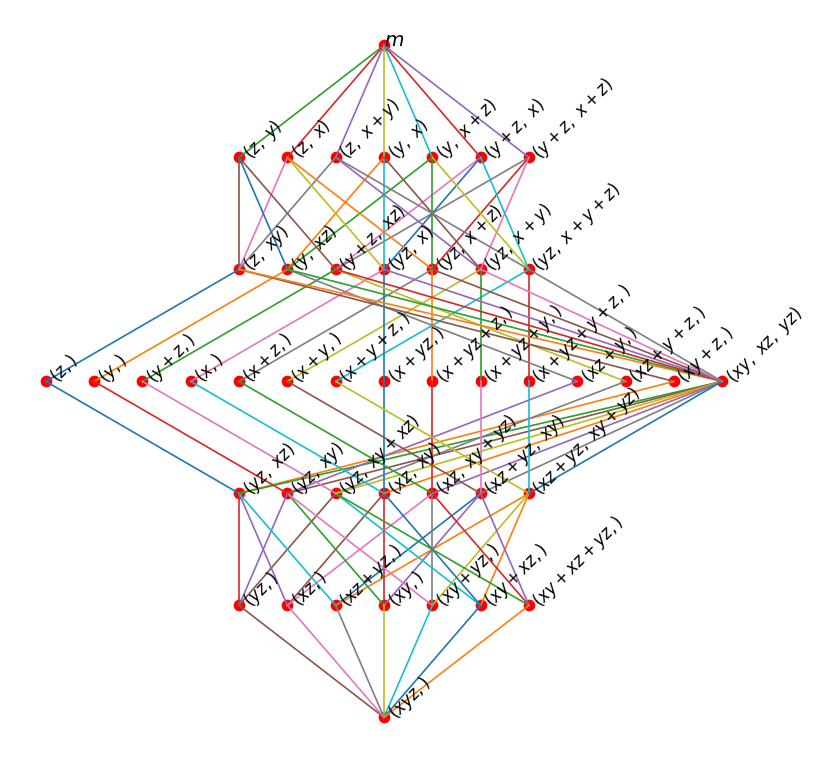

In [22]:
# @title $Poset$

# Update LC0_Poset (Lower Closure) for each ideal
for key1 in All_ideals.keys():
    for i in range(len(Poset_levels)):
        for key2 in Poset_levels[i]:
            if(key2 in LC_Poset[key1]):
                LC0_Poset[key1] = [key3 for key3 in LC0_Poset[key1] if key3 not in LC_Poset[key2]]

# Update UC0_Poset (Upper Closure) for each ideal
for key1 in All_ideals.keys():
    for i in range(len(Poset_levels)):
        for key2 in Poset_levels[i]:
            if(key2 in UC_Poset[key1]):
                UC0_Poset[key1] = [key3 for key3 in UC0_Poset[key1] if key3 not in UC_Poset[key2]]

# Import matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Create a new figure for plotting
figure(num=None, figsize=(8, 8), dpi=120, facecolor='w', edgecolor='k')

# Plot the maximal ideal
plt.scatter(0, 0, color='red')  # Plot the maximal ideal at origin
plt.text(0, 0, '$m$', fontsize=12)  # Label the maximal ideal

# Dictionary to store coordinates of each ideal for plotting
ideal_cords = {}
ideal_cords[Poset_levels[0][0]] = (0, 0)  # Set coordinate for the maximal ideal

# Plot ideals at each level
for i in range(1, len(Poset_levels)):
    n = len(Poset_levels[i])
    y_cords = [(-1 * i) for j in range(n)]  # Y-coordinates for the current level
    x_cords = list(range(-1 * (n - 1), n, 2))  # X-coordinates for the current level

    plt.scatter(x_cords, y_cords, color='red')  # Plot ideals at the current level

    # Add text labels for each ideal
    count = 0
    for key0 in Poset_levels[i]:
        ideal_cords[key0] = (x_cords[count], y_cords[count])
        plt.text(x_cords[count], y_cords[count], r'$' + sp.latex(Poset_levels[i][count]) + r'$', rotation=45, fontsize=10)
        count += 1

# Plot edges for upper closure (UC) relations
col = ['red', 'yellow', 'green', 'pink', 'blue', 'violet', 'purple']

for key1 in All_ideals.keys():
    for key2 in UC0_Poset[key1]:
        plt.plot([ideal_cords[key1][0], ideal_cords[key2][0]], [ideal_cords[key1][1], ideal_cords[key2][1]], linewidth=1)

# Hide axes and display the plot
plt.axis('off')
plt.show()